In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Used to display images in a specific colormap
import os
import random
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
path = os.getcwd()
data = loadmat(path+'\ex3data1.mat')#its a dictionary
print 'Data:\n',data['X'].shape,'\n',data['X'],'\n'
print 'Target:\n',data['y'].shape,'\n',data['y'],'\n'

Data:
(5000L, 400L) 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 

Target:
(5000L, 1L) 
[[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]] 



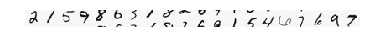

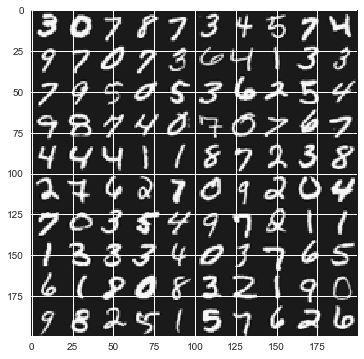

In [3]:
#Function To Display Images (copied from other source)
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x400,
    crates an image object from it, and returns it
    """
    width, height = 20, 20
    square = row.reshape(width,height)
    return square.T
    
def displayData(indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(data['X'].shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(data['X'][idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)

sample = np.random.choice(data['X'].shape[0], 20)
plt.imshow(data['X'][sample,1:].reshape(-1,20).T)
plt.axis('off')

displayData()

In [238]:
#Load Weights Already Provided
weights = loadmat(path+'\ex3weights.mat')
print 'Weight Keys:',weights.keys()
hiddenlayer_weight = weights['Theta1']
outputlayer_weight = weights['Theta2']
print hiddenlayer_weight.shape , outputlayer_weight.shape

Weight Keys: ['Theta2', '__version__', '__header__', 'Theta1', '__globals__']
(25L, 401L) (10L, 26L)


In [85]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))
sigmoid(0)

0.5

## Cost 
<img src='Cost.png'>
## Cost Regularized
<img src='Costreg.png'>

In [159]:
np.ones((1,1)).shape

(1L, 1L)

In [209]:
def feedForward(X,hiddenlayer_weight, outputlayer_weight,backprop =False):
    hidden_layer = sigmoid(np.dot(X,hiddenlayer_weight.transpose()))
    #Add Bias Neuron to hidden layer
    if backprop == False:
        a2 = np.c_[np.ones((X.shape[0],1)), hidden_layer]
    else:
        a2 = np.c_[np.ones((1,1)), hidden_layer]
     
    output_layer = sigmoid(np.dot(a2,outputlayer_weight.transpose()))
    return output_layer, a2

def computeCost(params,X,Y,input_layer_size,hidden_layer_size,num_labels,penalty):
    #reshape the stacked array of weights
    hidden_layer_weight = np.matrix(np.reshape(params[:hidden_layer_size * (input_layer_size + 1)],\
                                               (hidden_layer_size, (input_layer_size + 1))))

    output_layer_weight = np.matrix(np.reshape(params[hidden_layer_size * (input_layer_size + 1):], \
                                               (num_labels, (hidden_layer_size + 1))))
    
    output_layer,hidden_layer_wbias =feedForward(X,hidden_layer_weight,output_layer_weight)

    #Convert target from 5000X1 to 5000X10
    Y_tr = pd.get_dummies(classes.ravel()).as_matrix() 
    cost1 = -Y_tr.dot(np.log(output_layer).T)
    cost2 = (1-Y_tr).dot(np.log(1-output_layer).T)
    cost = np.trace(cost1 - cost2)/len(X)######
    reg =   (float(penalty)/float(2*len(X)))*(np.sum(np.square(hidden_layer_weight[:,1:])) +\
                                           np.sum(np.square(output_layer_weight[:,1:])))
    cost_reg =cost + reg
    return cost_reg

In [115]:
X = data['X']
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
Y = data['y']
print X.shape
print Y.shape

(5000L, 401L)
(5000L, 1L)


In [239]:
# initial setup
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

print hiddenlayer_weight.ravel().shape
print outputlayer_weight.ravel().shape
# randomly initialize a parameter array of the size of the full network's parameters
params_random = (np.random.random(size=hidden_layer_size * (input_layer_size + 1) + num_labels * (hidden_layer_size + 1)) - 0.5) * 0.25
params_given = np.r_[hiddenlayer_weight.ravel(), outputlayer_weight.ravel()]


(10025L,)
(260L,)


In [240]:
computeCost(params_given,X,Y,input_layer_size,hidden_layer_size,num_labels,penalty=1)

0.38376985909092365

## Sigmoid Gradient
<img src ='sigmoidgrad.png'>

In [241]:
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))


## Backpropogation
<img src='backprop.png'>

In [242]:
def backprop(params,X,Y,input_layer_size,hidden_layer_size,num_labels,penalty):
   
    #reshape the stacked array of weights
    hidden_layer_weight = np.matrix(np.reshape(params[:hidden_layer_size * (input_layer_size + 1)],\
                                               (hidden_layer_size, (input_layer_size + 1))))
    output_layer_weight = np.matrix(np.reshape(params[hidden_layer_size * (input_layer_size + 1):], \
                                               (num_labels, (hidden_layer_size + 1))))
    
    Delta1 = np.zeros(hidden_layer_weight.shape)  # (25, 401)
    Delta2 = np.zeros(output_layer_weight.shape)  # (10, 26)
    
    #Convert target from 5000X1 to 5000X10
    Y_tr = pd.get_dummies(classes.ravel()).as_matrix() 
    
    for i in range(len(X)):
        X_tr =X[i,:] #1X400
        output_layer,hidden_layer =feedForward(X_tr,hidden_layer_weight,output_layer_weight,backprop=True) #ol = 1X10,hl = 1X26
        delta3 = output_layer - Y_tr[i,:] #1X10
        delta2 = np.multiply((np.dot(delta3,output_layer_weight)), sigmoid_gradient(hidden_layer))  # (1, 26)
        
        a1 = X_tr.reshape((input_layer_size+1,1))#401X1
 
        Delta1 += np.dot(delta2[:,1:].transpose(),a1.transpose()) #(25,1)x(1,401) = (25,401
        Delta2 += np.dot(delta3.transpose(),hidden_layer) #(10,1)x(1,26) = (10,26) 
        

    Delta1 = Delta1/float(len(X))
    Delta2 = Delta2/float(len(X))

    #Regularization:
    Delta1[:,1:] = Delta1[:,1:] + (hidden_layer_weight[:,1:] *float(penalty))/len(X)
    Delta2[:,1:] = Delta2[:,1:] + (output_layer_weight[:,1:] *float(penalty))/len(X)
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(Delta1), np.ravel(Delta2)))
    
    return grad

In [243]:
grad = backprop(params_given,X,Y, input_layer_size, hidden_layer_size, num_labels, penalty =1)
grad.shape

(10285L,)

In [244]:
# minimize the objective function
penalty = 1
result = opt.minimize(fun=computeCost, x0=params_random, args=(X,Y,input_layer_size, hidden_layer_size, num_labels,penalty), 
                method='TNC', jac=backprop, options={'maxiter': 250})

In [245]:
hiddenlayer_weight_r = np.matrix(np.reshape(result.x[:hidden_layer_size * (input_layer_size + 1)], \
                                          (hidden_layer_size, (input_layer_size + 1))))
print hiddenlayer_weight_r.shape
outputlayer_weight_r = np.matrix(np.reshape(result.x[hidden_layer_size * (input_layer_size + 1):], \
                                          (num_labels, (hidden_layer_size + 1))))
print outputlayer_weight_r.shape
outputlayer , hiddenlayer = feedForward(X, hiddenlayer_weight_r, outputlayer_weight_r)
pred = np.array(np.argmax(outputlayer, axis=1) + 1)
pred


(25L, 401L)
(10L, 26L)


array([[10],
       [10],
       [10],
       ..., 
       [ 9],
       [ 9],
       [ 4]], dtype=int64)

In [246]:
correct = [1 if a == b else 0 for (a, b) in zip(pred, Y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print 'accuracy = {0}%'.format(accuracy * 100)

accuracy = 76.34%
